In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from functools import partial

In [74]:
def plot_discrete_function(x, y, ax, label):
    ax.set_title(label)
    ax.plot(x, y, color='grey', marker='o', markersize=1)

In [7]:
def root_of_unity(n, k):
    return cmath.exp(2j * cmath.pi * k / n)

def FFT(x):
    n = len(x)
    if n == 1:
        return x
    y0 = FFT(x[0::2])
    y1 = FFT(x[1::2])
    roots_of_unity = np.array([root_of_unity(n, -k) for k in range(n // 2)])
    return np.concatenate((y0 + roots_of_unity * y1, y0 - roots_of_unity * y1))

def FFTReverse(x):
    return np.conj(FFT(np.conj(x))) / len(x)

Let's compare FFT and FFTReverse with functions, defined in np.fft:

In [9]:
np.random.seed(0)
for i in range(1000):
    x = np.random.rand(64) + 1j * np.random.rand(64)
    fft1, fft2 = FFT(x), np.fft.fft(x)
    ifft1, ifft2 = FFTReverse(fft1), np.fft.ifft(fft2)
    assert np.isclose(fft1, fft2).all(), "FFT is incorrect"
    assert np.isclose(ifft1, ifft2).all(), "FFTReverse is incorrect"
print("OK!")

OK!


Let's????? prepare discretizations of observed???? functions.

In [88]:
x = np.linspace(0.01, 10, 1024)
functions = [
    (r'$y=x$', lambda x: x),
    (r'$y=x^2$', lambda x: x**2),
    (r'$y=\sin x$', lambda x: np.sin(x)),
    (r'$y=\sin x^2$', lambda x: np.sin(x**2)),
    (r'$y=\frac{\sin x}{x}$', lambda x: np.sin(x) / x)]
y = [f(x) for n, f in functions]

Let's?????? transform our function, than reverse transform and plot it

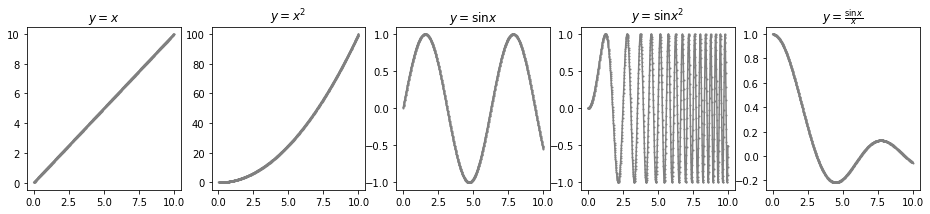

In [89]:
fig, ax = plt.subplots(1, len(y), figsize=(16, 3))
for i in range(len(y)):
    g = FFT(y[i])
    f2 = FFTReverse(g)
    plot_discrete_function(x, f2, ax[i], functions[i][0])

Let's now experiment with D.

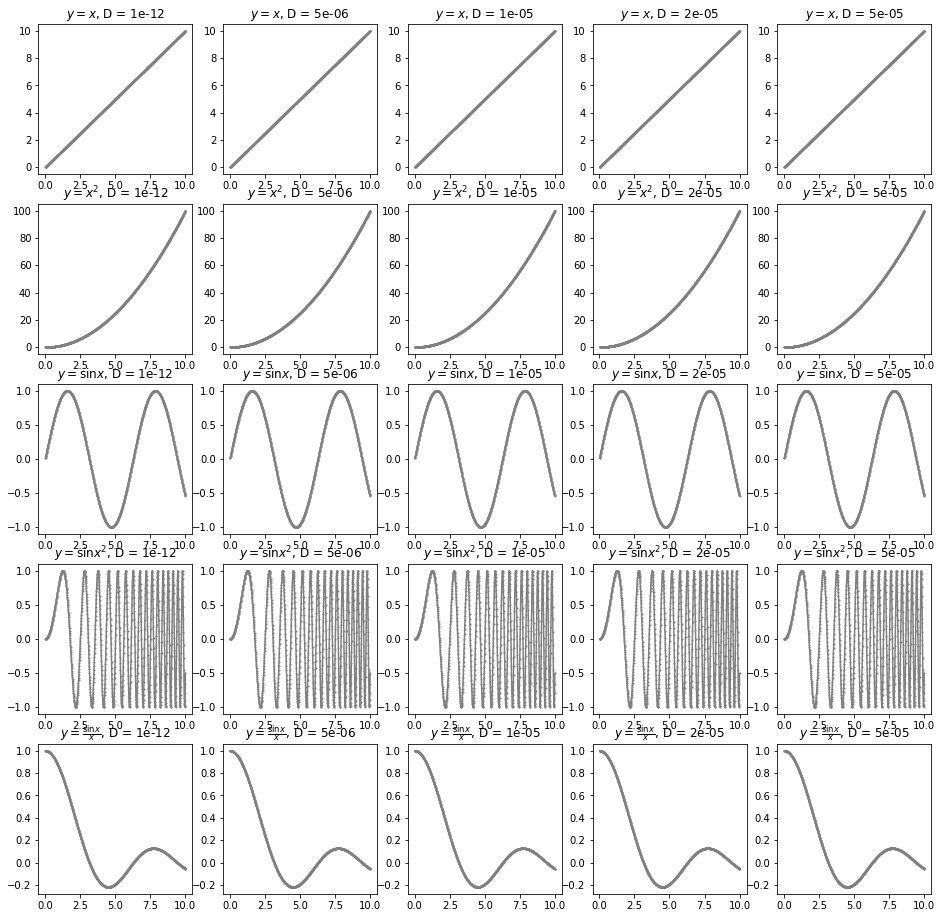

In [96]:
D = [0.000000000001, 0.000005, 0.00001, 0.00002, 0.00005]
fig, ax = plt.subplots(len(y), len(D), figsize=(16, 16))
for i in range(len(y)):
    for j in range(len(D)):
        g = FFT(y[i])
        #for k in range(int((1 - D[j]) * (len(g) - 1)), len(g)):
        #    g[k] = 0
        f2 = FFTReverse(g)
        plot_discrete_function(x, f2, ax[i][j],
            functions[i][0] + ', D = ' + str(D[j]))